In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt

def sig(X):
    return 1 / (1 + np.exp(-X))

def delta_sig(X):
    return sig(X) * (1 - sig(X))

In [2]:
data = np.array([
    [1, 1, 0],
    [0, 1, 1],
    [1, 0, 1],
    [0, 0, 0]
])
data = np.array(data)

In [3]:
w0 = np.random.randn(2, 3)
w1 = np.random.randn(1, 3)
lr = 0.09 #learning rate
m = len(data)
J = []

epochs = 100000

y = data[:, 2]
X = data[:, :2]

a0 = np.hstack((np.ones((m * 1, 1)), X))
a0 = a0.T

for epoch in range(epochs):

    z1 = np.matmul(w0, a0)
    a1 = sig(z1)
    a1 = np.vstack((np.ones(m * 1), a1))

    z2 = np.matmul(w1, a1)
    a2 = sig(z2)

    delta2 = a2 - y.T

    delta1 = np.matmul(w1.transpose(), delta2) * np.vstack((np.ones(m * 1), delta_sig(z1)))
    delta1 = delta1[1:, :]

    Delta1 = np.matmul(delta2, a1.T)
    Delta0 = np.matmul(delta1, a0.T)

    w0 -= lr * (1 / m) * Delta0
    w1 -= lr * (1 / m) * Delta1

    J.append(np.sum(-y * np.log(a2) - (1 - y) * np.log(1 - a2)))
    if epoch % 1000 == 0: print(J[epoch])

2.78022425840632
2.764308589665748
2.6848803821092293
1.863887144550123
0.6108133036774381
0.2901216539308993
0.1820729226404032
0.13080888281736755
0.10143900289483537
0.08256856453547765
0.06948252586487702
0.059901914128300496
0.05259815295474282
0.0468531900586938
0.042220423997811916
0.03840803649001308
0.03521754721733884
0.03250939971956045
0.03018268476039848
0.02816267474356593
0.02639287798553302
0.02482981377330043
0.023439482128242255
0.022194921113282647
0.021074480629573143
0.020060579387740647
0.01913879458009985
0.01829718497808574
0.017525780602727213
0.01681619310753136
0.016161314877926675
0.01555508417755876
0.014992300050515757
0.014468475118879182
0.013979717535863814
0.013522635582181027
0.013094260002379976
0.012691980353575872
0.012313492507043404
0.011956755090443758
0.011619953145588884
0.011301467646459038
0.010999849805204381
0.010713799312154413
0.010442145825430101
0.010183833158396133
0.009937905717624713
0.009703496826760846
0.009479818637611107
0.00926

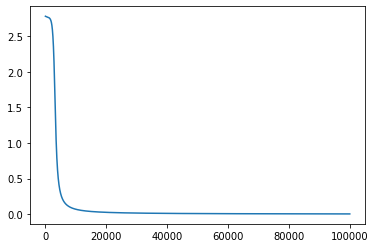

Jmin:0.004298940383022885 in epoch99999


In [4]:
plt.plot(range(epochs), J)
plt.show()
print(f"Jmin:{np.min(J)} in epoch{J.index(np.min(J))}",)

In [5]:
lr = 0.09 #learning rate
m = len(data)
epochs = 10000

epsilon1 = np.sqrt(6) / (np.sqrt(2) + np.sqrt(3))
epsilon2 = np.sqrt(6) / (np.sqrt(1) + np.sqrt(3))

w0 = np.random.randn(2, 3)
w1 = np.random.randn(1, 3)

for i in range(epochs):
    np.random.shuffle(data)
    J = 0
    Delta0 = Delta1 = 0
    for example in data:
        y = example[2]
        a0 = np.array([[example[0]], [example[1]]])
        a0 = np.vstack((1, a0))

        z1 = np.matmul(w0, a0)
        a1 = sig(z1)
        a1 = np.vstack((1, a1))

        z2 = np.matmul(w1, a1)
        a2 = sig(z2)

        delta2 = a2 - y

        delta1 = np.matmul(w1.transpose(), delta2) * np.vstack((1, delta_sig(z1)))
        delta1 = delta1[1:]

        Delta1 += np.matmul(delta2, a1.transpose())
        Delta0 += np.matmul(delta1, a0.transpose())

        J += (-y * np.log(a2) - (1 - y) * np.log(1 - a2))
        #forward pass
        #y =



    w0 -= lr * (1 / m) * Delta0
    w1 -= lr * (1 / m) * Delta1

    if i % 1000 == 0:
        print(f"cost on epoch n.{i}:", J)

cost on epoch n.0: [[3.42696123]]
cost on epoch n.1000: [[2.45906524]]
cost on epoch n.2000: [[2.12050907]]
cost on epoch n.3000: [[1.70191954]]
cost on epoch n.4000: [[0.73055244]]
cost on epoch n.5000: [[0.33005384]]
cost on epoch n.6000: [[0.20009382]]
cost on epoch n.7000: [[0.1411083]]
cost on epoch n.8000: [[0.10819936]]
cost on epoch n.9000: [[0.08740816]]


In [6]:
def predict(x1, x2):
    a0 = np.array([[1], [x1], [x2]])

    z1 = np.matmul(w0, a0)
    a1 = sig(z1)
    a1 = np.vstack((1, a1))
    z2 = np.matmul(w1, a1)
    a2 = sig(z2)

    return a2, np.round(a2)

In [7]:
prob, x = predict(0, 0)
print(prob, x)

[[0.01424245]] [[0.]]


In [8]:
avg_acc = 0

for i in range(100):
    for j in range(4):
        p, ans = predict(data[j][0], data[j][1])
        if ans == data[j][2]: avg_acc += 1

avg_acc /= 400
print("accuracy: ", avg_acc)
#%

accuracy:  1.0
